In [1]:
import sys

sys.path

sys.path.append("/Users/hbuhrmann/PycharmProjects/CycleStats")

In [2]:
import sourcetocsv as cycle
import numpy as np
import thinkstats2
import thinkplot
import pandas as pd

In [73]:
files = pd.DataFrame(np.array(
    [
        ['_01_01_La_Trona.csv','Consistent','Day 1 Fresh'],
        ['_01_02_La_Trona.csv','Variable',  'Day 1 Tired'],
        ['_01_03_La_Trona.csv','Variable',  'Day 2 Fresh'],
        ['_01_04_La_Trona.csv','Consistent','Day 2 Tired'],
        ['_01_05_La_Trona.csv','Consistent','Day 3 Fresh'],
        ['_01_06_La_Trona.csv','Variable',  'Day 3 Tired'],
        ['_01_07_La_Trona.csv','Consistent',  'Day 5 Fresh'],        
        ['_01_08_La_Trona.csv','Consistent',  'Day 5 Tired']                
    ]),
    columns =['FileName','PowerStyle','LegState']
    )

#filepath = 'C:/Users/hanne/PycharmProjects/CycleStats/PowerOutputExperiments/FinalFiles/'

filepath = '/users/hbuhrmann/PycharmProjects/CycleStats/PowerOutputExperiments/FinalFiles/'

rundfs = [cycle.getfinalcsvcycledata(filepath,filename) for filename in files.FileName]

for rundf in rundfs:
    rundf['CumEnergy']=rundf.Watts.cumsum()
    rundf['TenSecPowerMean'] = rundf.Watts.rolling(window=10).mean()
    rundf['MinutePowerMean'] = rundf.Watts.rolling(window=60).mean()
    rundf['FiveMinutePowerMean'] = rundf.Watts.rolling(window=300).mean()
    rundf['TenSecondShiftedTwentySeconds'] = rundf.TenSecPowerMean.shift(20)
    
files['RunDF'] = rundfs

for index,row in files.iterrows():
    print(f'{row.FileName}, {len(row.RunDF)}')

_01_01_La_Trona.csv, 3018
_01_02_La_Trona.csv, 2887
_01_03_La_Trona.csv, 2881
_01_04_La_Trona.csv, 2964
_01_05_La_Trona.csv, 2862
_01_06_La_Trona.csv, 2962
_01_07_La_Trona.csv, 2768
_01_08_La_Trona.csv, 2866


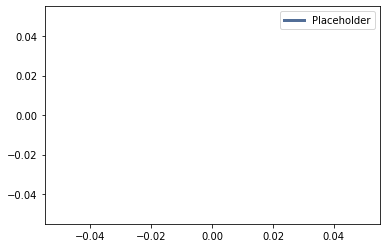

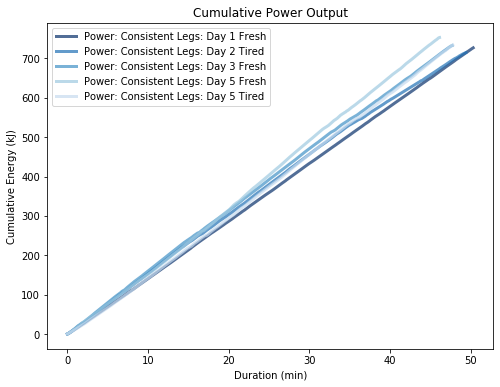

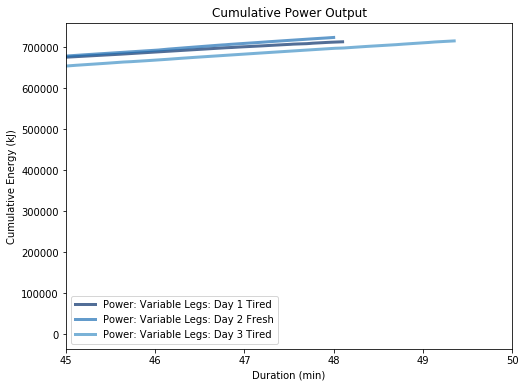

<Figure size 576x432 with 0 Axes>

In [4]:
#Placeholder to get rid of the smaller size graph
thinkplot.Plot([0],[0],label='Placeholder')    
thinkplot.Show()

#Cumulative power for consistent output
for index,row in files[files.PowerStyle=='Consistent'].iterrows():
    thinkplot.Plot(row.RunDF.ElapasedDuration/1000/60,row.RunDF.CumEnergy/1000,label='Power: '+row.PowerStyle+' Legs: '+row.LegState)    

thinkplot.Config(xlabel='Duration (min)', ylabel='Cumulative Energy (kJ)',title='Cumulative Power Output')
thinkplot.Show()

#Cumulative power for consistent output
for index,row in files[files.PowerStyle=='Variable'].iterrows():
    thinkplot.Plot(row.RunDF.ElapasedDuration/1000/60,row.RunDF.CumEnergy,label='Power: '+row.PowerStyle+' Legs: '+row.LegState)    

thinkplot.Config(xlabel='Duration (min)', ylabel='Cumulative Energy (kJ)',title='Cumulative Power Output',xlim=(45,50))
thinkplot.Show()


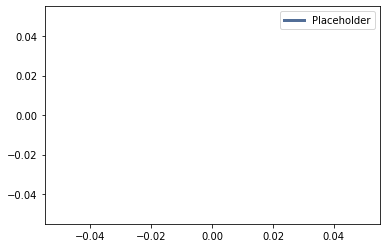

Cumulative Average Power for Consistent  power delivery
  


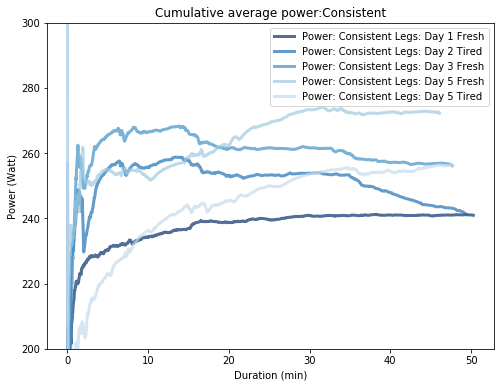

Cumulative Average Power for Variable  power delivery
  


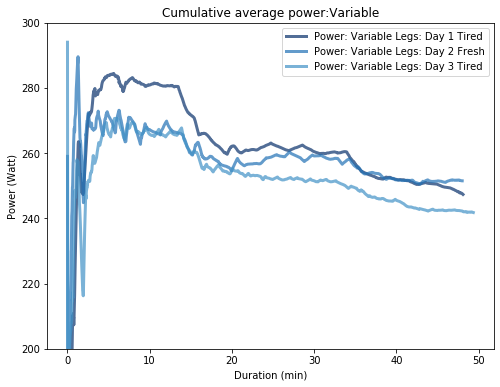

<Figure size 576x432 with 0 Axes>

In [5]:
#Placeholder to get rid of the smaller size graph
thinkplot.Plot([0],[0],label='Placeholder')    
thinkplot.Show()

for style,value in files.PowerStyle.value_counts().items():
    #Power applied over time, smoothed over five minutes
    print('=============================================')
    print('Cumulative Average Power for',style,' power delivery')
    print('=============================================')
    print('  ')
    for index,row in files[files.PowerStyle==style].iterrows():
        thinkplot.Plot(row.RunDF.ElapasedDuration/1000/60,row.RunDF.CumEnergy/row.RunDF.ElapasedDuration*1000   ,label='Power: '+row.PowerStyle+' Legs: '+row.LegState)
   
    thinkplot.Config(xlabel='Duration (min)', ylabel='Power (Watt)',title='Cumulative average power:'+style,ylim=(200,300))
    thinkplot.Show()

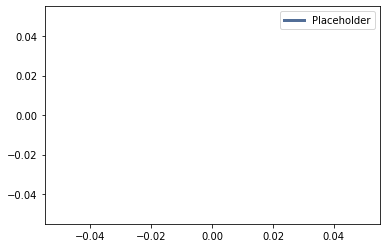

5 Minute Movering Average Power for Consistent  power delivery
  


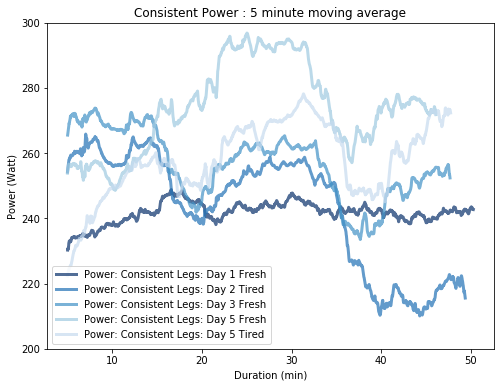

5 Minute Movering Average Power for Variable  power delivery
  


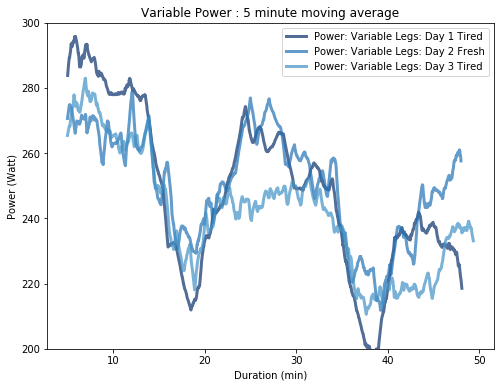

<Figure size 576x432 with 0 Axes>

In [9]:
#Placeholder to get rid of the smaller size graph
thinkplot.Plot([0],[0],label='Placeholder')    
thinkplot.Show()


for style,value in files.PowerStyle.value_counts().items():
    #Power applied over time, smoothed over five minutes
    print('=============================================')
    print('5 Minute Movering Average Power for',style,' power delivery')
    print('=============================================')
    print('  ')
    for index,row in files[files.PowerStyle==style].iterrows():
        thinkplot.Plot(row.RunDF.ElapasedDuration/1000/60,row.RunDF.FiveMinutePowerMean   ,label='Power: '+row.PowerStyle+' Legs: '+row.LegState)

    #thinkplot.Plot(files.loc[0].RunDF.ElapasedDuration/1000/60,(files.loc[0].RunDF.AltitudeMeters-400)/5+200,label='Altitude')
   
    thinkplot.Config(xlabel='Duration (min)', ylabel='Power (Watt)',title=style+' Power : 5 minute moving average',ylim=(200,300))
    thinkplot.Show()




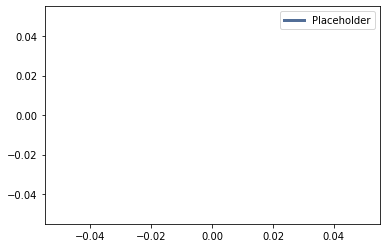

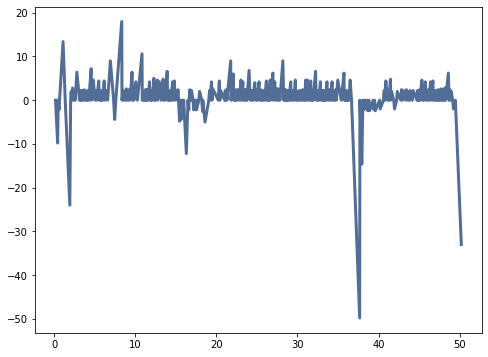

<Figure size 576x432 with 0 Axes>

In [8]:
#Placeholder to get rid of the smaller size graph
thinkplot.Plot([0],[0],label='Placeholder')    
thinkplot.Show()

df = rundfs[0][rundfs[0].RunEnd2 == True]

thinkplot.Plot(df.ElapasedDuration/1000/60,df.RunElevation2)

thinkplot.Show()

In [72]:
#Checking correlation between heart rate and power
#First load all 8 files

    
filepath = '/users/hbuhrmann/PycharmProjects/CycleStats/PowerOutputExperiments/FinalFiles/'

allruns = cycle.getfinalcsvcycledata(filepath,'_all_8_rides.csv')

allruns['CumEnergy']=rundf.Watts.cumsum()
allruns['TenSecPowerMean'] = rundf.Watts.rolling(window=10).mean()
allruns['MinutePowerMean'] = rundf.Watts.rolling(window=60).mean()
allruns['FiveMinutePowerMean'] = rundf.Watts.rolling(window=300).mean()
allruns['TenSecondShiftedTwentySeconds'] = rundf.TenSecPowerMean.shift(20)
    
for index,row in allruns.iterrows():
    print (f'{index} : {np.round(row.TenSecPowerMean,3)},{np.round(row.MinutePowerMean,3)},{np.round(row.FiveMinutePowerMean,3)},{np.round(row.TenSecondShiftedTwentySeconds,3)}')

0 : nan,nan,nan,nan
1 : nan,nan,nan,nan
2 : nan,nan,nan,nan
3 : nan,nan,nan,nan
4 : nan,nan,nan,nan
5 : nan,nan,nan,nan
6 : nan,nan,nan,nan
7 : nan,nan,nan,nan
8 : nan,nan,nan,nan
9 : 161.0,nan,nan,nan
10 : 162.7,nan,nan,nan
11 : 165.3,nan,nan,nan
12 : 164.6,nan,nan,nan
13 : 167.0,nan,nan,nan
14 : 169.7,nan,nan,nan
15 : 173.2,nan,nan,nan
16 : 176.0,nan,nan,nan
17 : 176.5,nan,nan,nan
18 : 178.4,nan,nan,nan
19 : 177.5,nan,nan,nan
20 : 181.1,nan,nan,nan
21 : 181.8,nan,nan,nan
22 : 189.3,nan,nan,nan
23 : 196.3,nan,nan,nan
24 : 196.1,nan,nan,nan
25 : 196.6,nan,nan,nan
26 : 201.1,nan,nan,nan
27 : 202.9,nan,nan,nan
28 : 200.6,nan,nan,nan
29 : 200.4,nan,nan,161.0
30 : 201.1,nan,nan,162.7
31 : 203.8,nan,nan,165.3
32 : 200.7,nan,nan,164.6
33 : 197.1,nan,nan,167.0
34 : 199.1,nan,nan,169.7
35 : 199.8,nan,nan,173.2
36 : 196.5,nan,nan,176.0
37 : 195.3,nan,nan,176.5
38 : 198.6,nan,nan,178.4
39 : 202.6,nan,nan,177.5
40 : 199.5,nan,nan,181.1
41 : 199.6,nan,nan,181.8
42 : 198.7,nan,nan,189.3
43 : 204.0,

658 : 264.3,247.383,250.513,259.4
659 : 267.0,247.15,250.64,266.3
660 : 271.2,248.0,250.727,272.6
661 : 274.4,248.817,250.87,275.8
662 : 275.3,249.6,250.92,280.0
663 : 271.0,249.25,250.92,282.0
664 : 266.8,248.917,250.997,285.1
665 : 264.2,249.9,251.073,286.0
666 : 263.6,251.067,251.197,279.0
667 : 263.5,252.317,251.303,273.6
668 : 263.5,253.683,251.387,274.4
669 : 262.6,254.85,251.43,265.6
670 : 260.7,256.267,251.55,256.8
671 : 261.5,257.583,251.737,251.9
672 : 263.8,258.833,251.897,248.0
673 : 267.0,259.467,252.05,249.4
674 : 268.6,259.7,252.123,246.8
675 : 270.0,259.9,252.19,244.8
676 : 269.1,260.7,252.227,253.7
677 : 270.2,261.917,252.347,262.6
678 : 271.6,262.75,252.45,264.3
679 : 272.2,262.833,252.54,267.0
680 : 271.2,263.083,252.513,271.2
681 : 270.7,263.833,252.587,274.4
682 : 270.1,264.7,252.687,275.3
683 : 269.3,265.5,252.773,271.0
684 : 270.0,265.933,252.903,266.8
685 : 269.0,265.767,252.97,264.2
686 : 267.7,266.017,253.017,263.6
687 : 264.2,265.883,253.03,263.5
688 : 261.3,

1382 : 269.5,273.233,263.25,285.6
1383 : 272.3,274.3,263.457,284.4
1384 : 275.2,275.5,263.56,283.7
1385 : 278.1,275.833,263.613,284.9
1386 : 278.0,275.917,263.617,287.4
1387 : 279.0,277.017,263.673,287.2
1388 : 279.3,278.1,263.717,285.2
1389 : 282.8,278.633,263.807,284.0
1390 : 284.6,278.433,263.79,281.6
1391 : 285.4,278.767,263.74,279.6
1392 : 285.3,278.9,263.697,278.3
1393 : 285.0,279.867,263.83,278.6
1394 : 286.5,279.6,264.003,277.9
1395 : 285.9,281.117,264.107,275.3
1396 : 286.8,282.633,264.21,273.4
1397 : 284.7,282.783,264.423,273.4
1398 : 282.6,282.933,264.637,275.4
1399 : 279.1,282.65,264.597,275.0
1400 : 280.8,282.617,264.73,272.6
1401 : 284.9,282.483,264.98,269.8
1402 : 288.6,282.4,264.933,269.5
1403 : 287.2,282.467,265.107,272.3
1404 : 287.0,282.883,265.35,275.2
1405 : 284.4,282.567,265.363,278.1
1406 : 284.1,282.633,265.207,278.0
1407 : 285.3,282.383,265.423,279.0
1408 : 288.4,282.45,265.76,279.3
1409 : 287.4,282.05,265.97,282.8
1410 : 285.9,282.2,266.107,284.6
1411 : 283.0,

2215 : 259.8,216.95,247.107,270.8
2216 : 266.3,220.983,247.447,251.6
2217 : 276.6,224.883,247.713,240.1
2218 : 289.9,228.25,247.98,226.6
2219 : 303.2,231.25,248.287,211.9
2220 : 308.4,233.633,248.363,197.2
2221 : 307.1,236.3,248.363,185.6
2222 : 303.0,237.933,248.313,177.4
2223 : 300.9,238.517,248.157,178.0
2224 : 305.2,240.533,248.087,185.7
2225 : 307.1,244.133,248.333,196.6
2226 : 303.5,246.433,248.597,211.5
2227 : 287.2,247.417,248.437,221.6
2228 : 270.6,248.767,248.26,229.0
2229 : 257.4,251.933,248.167,235.2
2230 : 248.5,254.667,247.973,242.6
2231 : 241.9,255.35,247.78,252.5
2232 : 245.5,256.45,247.833,265.7
2233 : 246.7,256.5,247.687,273.0
2234 : 245.4,255.983,247.58,258.8
2235 : 239.9,256.217,247.65,259.8
2236 : 233.5,256.3,247.603,266.3
2237 : 246.2,257.833,247.727,276.6
2238 : 252.2,257.733,247.627,289.9
2239 : 254.8,258.333,247.51,303.2
2240 : 260.8,259.083,247.513,308.4
2241 : 270.3,260.333,247.577,307.1
2242 : 270.6,260.983,247.567,303.0
2243 : 280.9,262.6,247.737,300.9
2244

3007 : nan,nan,nan,nan
3008 : nan,nan,nan,nan
3009 : nan,nan,nan,nan
3010 : nan,nan,nan,nan
3011 : nan,nan,nan,nan
3012 : nan,nan,nan,nan
3013 : nan,nan,nan,nan
3014 : nan,nan,nan,nan
3015 : nan,nan,nan,nan
3016 : nan,nan,nan,nan
3017 : nan,nan,nan,nan
3018 : nan,nan,nan,nan
3019 : nan,nan,nan,nan
3020 : nan,nan,nan,nan
3021 : nan,nan,nan,nan
3022 : nan,nan,nan,nan
3023 : nan,nan,nan,nan
3024 : nan,nan,nan,nan
3025 : nan,nan,nan,nan
3026 : nan,nan,nan,nan
3027 : nan,nan,nan,nan
3028 : nan,nan,nan,nan
3029 : nan,nan,nan,nan
3030 : nan,nan,nan,nan
3031 : nan,nan,nan,nan
3032 : nan,nan,nan,nan
3033 : nan,nan,nan,nan
3034 : nan,nan,nan,nan
3035 : nan,nan,nan,nan
3036 : nan,nan,nan,nan
3037 : nan,nan,nan,nan
3038 : nan,nan,nan,nan
3039 : nan,nan,nan,nan
3040 : nan,nan,nan,nan
3041 : nan,nan,nan,nan
3042 : nan,nan,nan,nan
3043 : nan,nan,nan,nan
3044 : nan,nan,nan,nan
3045 : nan,nan,nan,nan
3046 : nan,nan,nan,nan
3047 : nan,nan,nan,nan
3048 : nan,nan,nan,nan
3049 : nan,nan,nan,nan
3050 : nan,

3746 : nan,nan,nan,nan
3747 : nan,nan,nan,nan
3748 : nan,nan,nan,nan
3749 : nan,nan,nan,nan
3750 : nan,nan,nan,nan
3751 : nan,nan,nan,nan
3752 : nan,nan,nan,nan
3753 : nan,nan,nan,nan
3754 : nan,nan,nan,nan
3755 : nan,nan,nan,nan
3756 : nan,nan,nan,nan
3757 : nan,nan,nan,nan
3758 : nan,nan,nan,nan
3759 : nan,nan,nan,nan
3760 : nan,nan,nan,nan
3761 : nan,nan,nan,nan
3762 : nan,nan,nan,nan
3763 : nan,nan,nan,nan
3764 : nan,nan,nan,nan
3765 : nan,nan,nan,nan
3766 : nan,nan,nan,nan
3767 : nan,nan,nan,nan
3768 : nan,nan,nan,nan
3769 : nan,nan,nan,nan
3770 : nan,nan,nan,nan
3771 : nan,nan,nan,nan
3772 : nan,nan,nan,nan
3773 : nan,nan,nan,nan
3774 : nan,nan,nan,nan
3775 : nan,nan,nan,nan
3776 : nan,nan,nan,nan
3777 : nan,nan,nan,nan
3778 : nan,nan,nan,nan
3779 : nan,nan,nan,nan
3780 : nan,nan,nan,nan
3781 : nan,nan,nan,nan
3782 : nan,nan,nan,nan
3783 : nan,nan,nan,nan
3784 : nan,nan,nan,nan
3785 : nan,nan,nan,nan
3786 : nan,nan,nan,nan
3787 : nan,nan,nan,nan
3788 : nan,nan,nan,nan
3789 : nan,

4377 : nan,nan,nan,nan
4378 : nan,nan,nan,nan
4379 : nan,nan,nan,nan
4380 : nan,nan,nan,nan
4381 : nan,nan,nan,nan
4382 : nan,nan,nan,nan
4383 : nan,nan,nan,nan
4384 : nan,nan,nan,nan
4385 : nan,nan,nan,nan
4386 : nan,nan,nan,nan
4387 : nan,nan,nan,nan
4388 : nan,nan,nan,nan
4389 : nan,nan,nan,nan
4390 : nan,nan,nan,nan
4391 : nan,nan,nan,nan
4392 : nan,nan,nan,nan
4393 : nan,nan,nan,nan
4394 : nan,nan,nan,nan
4395 : nan,nan,nan,nan
4396 : nan,nan,nan,nan
4397 : nan,nan,nan,nan
4398 : nan,nan,nan,nan
4399 : nan,nan,nan,nan
4400 : nan,nan,nan,nan
4401 : nan,nan,nan,nan
4402 : nan,nan,nan,nan
4403 : nan,nan,nan,nan
4404 : nan,nan,nan,nan
4405 : nan,nan,nan,nan
4406 : nan,nan,nan,nan
4407 : nan,nan,nan,nan
4408 : nan,nan,nan,nan
4409 : nan,nan,nan,nan
4410 : nan,nan,nan,nan
4411 : nan,nan,nan,nan
4412 : nan,nan,nan,nan
4413 : nan,nan,nan,nan
4414 : nan,nan,nan,nan
4415 : nan,nan,nan,nan
4416 : nan,nan,nan,nan
4417 : nan,nan,nan,nan
4418 : nan,nan,nan,nan
4419 : nan,nan,nan,nan
4420 : nan,

5040 : nan,nan,nan,nan
5041 : nan,nan,nan,nan
5042 : nan,nan,nan,nan
5043 : nan,nan,nan,nan
5044 : nan,nan,nan,nan
5045 : nan,nan,nan,nan
5046 : nan,nan,nan,nan
5047 : nan,nan,nan,nan
5048 : nan,nan,nan,nan
5049 : nan,nan,nan,nan
5050 : nan,nan,nan,nan
5051 : nan,nan,nan,nan
5052 : nan,nan,nan,nan
5053 : nan,nan,nan,nan
5054 : nan,nan,nan,nan
5055 : nan,nan,nan,nan
5056 : nan,nan,nan,nan
5057 : nan,nan,nan,nan
5058 : nan,nan,nan,nan
5059 : nan,nan,nan,nan
5060 : nan,nan,nan,nan
5061 : nan,nan,nan,nan
5062 : nan,nan,nan,nan
5063 : nan,nan,nan,nan
5064 : nan,nan,nan,nan
5065 : nan,nan,nan,nan
5066 : nan,nan,nan,nan
5067 : nan,nan,nan,nan
5068 : nan,nan,nan,nan
5069 : nan,nan,nan,nan
5070 : nan,nan,nan,nan
5071 : nan,nan,nan,nan
5072 : nan,nan,nan,nan
5073 : nan,nan,nan,nan
5074 : nan,nan,nan,nan
5075 : nan,nan,nan,nan
5076 : nan,nan,nan,nan
5077 : nan,nan,nan,nan
5078 : nan,nan,nan,nan
5079 : nan,nan,nan,nan
5080 : nan,nan,nan,nan
5081 : nan,nan,nan,nan
5082 : nan,nan,nan,nan
5083 : nan,

5756 : nan,nan,nan,nan
5757 : nan,nan,nan,nan
5758 : nan,nan,nan,nan
5759 : nan,nan,nan,nan
5760 : nan,nan,nan,nan
5761 : nan,nan,nan,nan
5762 : nan,nan,nan,nan
5763 : nan,nan,nan,nan
5764 : nan,nan,nan,nan
5765 : nan,nan,nan,nan
5766 : nan,nan,nan,nan
5767 : nan,nan,nan,nan
5768 : nan,nan,nan,nan
5769 : nan,nan,nan,nan
5770 : nan,nan,nan,nan
5771 : nan,nan,nan,nan
5772 : nan,nan,nan,nan
5773 : nan,nan,nan,nan
5774 : nan,nan,nan,nan
5775 : nan,nan,nan,nan
5776 : nan,nan,nan,nan
5777 : nan,nan,nan,nan
5778 : nan,nan,nan,nan
5779 : nan,nan,nan,nan
5780 : nan,nan,nan,nan
5781 : nan,nan,nan,nan
5782 : nan,nan,nan,nan
5783 : nan,nan,nan,nan
5784 : nan,nan,nan,nan
5785 : nan,nan,nan,nan
5786 : nan,nan,nan,nan
5787 : nan,nan,nan,nan
5788 : nan,nan,nan,nan
5789 : nan,nan,nan,nan
5790 : nan,nan,nan,nan
5791 : nan,nan,nan,nan
5792 : nan,nan,nan,nan
5793 : nan,nan,nan,nan
5794 : nan,nan,nan,nan
5795 : nan,nan,nan,nan
5796 : nan,nan,nan,nan
5797 : nan,nan,nan,nan
5798 : nan,nan,nan,nan
5799 : nan,

6400 : nan,nan,nan,nan
6401 : nan,nan,nan,nan
6402 : nan,nan,nan,nan
6403 : nan,nan,nan,nan
6404 : nan,nan,nan,nan
6405 : nan,nan,nan,nan
6406 : nan,nan,nan,nan
6407 : nan,nan,nan,nan
6408 : nan,nan,nan,nan
6409 : nan,nan,nan,nan
6410 : nan,nan,nan,nan
6411 : nan,nan,nan,nan
6412 : nan,nan,nan,nan
6413 : nan,nan,nan,nan
6414 : nan,nan,nan,nan
6415 : nan,nan,nan,nan
6416 : nan,nan,nan,nan
6417 : nan,nan,nan,nan
6418 : nan,nan,nan,nan
6419 : nan,nan,nan,nan
6420 : nan,nan,nan,nan
6421 : nan,nan,nan,nan
6422 : nan,nan,nan,nan
6423 : nan,nan,nan,nan
6424 : nan,nan,nan,nan
6425 : nan,nan,nan,nan
6426 : nan,nan,nan,nan
6427 : nan,nan,nan,nan
6428 : nan,nan,nan,nan
6429 : nan,nan,nan,nan
6430 : nan,nan,nan,nan
6431 : nan,nan,nan,nan
6432 : nan,nan,nan,nan
6433 : nan,nan,nan,nan
6434 : nan,nan,nan,nan
6435 : nan,nan,nan,nan
6436 : nan,nan,nan,nan
6437 : nan,nan,nan,nan
6438 : nan,nan,nan,nan
6439 : nan,nan,nan,nan
6440 : nan,nan,nan,nan
6441 : nan,nan,nan,nan
6442 : nan,nan,nan,nan
6443 : nan,

7186 : nan,nan,nan,nan
7187 : nan,nan,nan,nan
7188 : nan,nan,nan,nan
7189 : nan,nan,nan,nan
7190 : nan,nan,nan,nan
7191 : nan,nan,nan,nan
7192 : nan,nan,nan,nan
7193 : nan,nan,nan,nan
7194 : nan,nan,nan,nan
7195 : nan,nan,nan,nan
7196 : nan,nan,nan,nan
7197 : nan,nan,nan,nan
7198 : nan,nan,nan,nan
7199 : nan,nan,nan,nan
7200 : nan,nan,nan,nan
7201 : nan,nan,nan,nan
7202 : nan,nan,nan,nan
7203 : nan,nan,nan,nan
7204 : nan,nan,nan,nan
7205 : nan,nan,nan,nan
7206 : nan,nan,nan,nan
7207 : nan,nan,nan,nan
7208 : nan,nan,nan,nan
7209 : nan,nan,nan,nan
7210 : nan,nan,nan,nan
7211 : nan,nan,nan,nan
7212 : nan,nan,nan,nan
7213 : nan,nan,nan,nan
7214 : nan,nan,nan,nan
7215 : nan,nan,nan,nan
7216 : nan,nan,nan,nan
7217 : nan,nan,nan,nan
7218 : nan,nan,nan,nan
7219 : nan,nan,nan,nan
7220 : nan,nan,nan,nan
7221 : nan,nan,nan,nan
7222 : nan,nan,nan,nan
7223 : nan,nan,nan,nan
7224 : nan,nan,nan,nan
7225 : nan,nan,nan,nan
7226 : nan,nan,nan,nan
7227 : nan,nan,nan,nan
7228 : nan,nan,nan,nan
7229 : nan,

8080 : nan,nan,nan,nan
8081 : nan,nan,nan,nan
8082 : nan,nan,nan,nan
8083 : nan,nan,nan,nan
8084 : nan,nan,nan,nan
8085 : nan,nan,nan,nan
8086 : nan,nan,nan,nan
8087 : nan,nan,nan,nan
8088 : nan,nan,nan,nan
8089 : nan,nan,nan,nan
8090 : nan,nan,nan,nan
8091 : nan,nan,nan,nan
8092 : nan,nan,nan,nan
8093 : nan,nan,nan,nan
8094 : nan,nan,nan,nan
8095 : nan,nan,nan,nan
8096 : nan,nan,nan,nan
8097 : nan,nan,nan,nan
8098 : nan,nan,nan,nan
8099 : nan,nan,nan,nan
8100 : nan,nan,nan,nan
8101 : nan,nan,nan,nan
8102 : nan,nan,nan,nan
8103 : nan,nan,nan,nan
8104 : nan,nan,nan,nan
8105 : nan,nan,nan,nan
8106 : nan,nan,nan,nan
8107 : nan,nan,nan,nan
8108 : nan,nan,nan,nan
8109 : nan,nan,nan,nan
8110 : nan,nan,nan,nan
8111 : nan,nan,nan,nan
8112 : nan,nan,nan,nan
8113 : nan,nan,nan,nan
8114 : nan,nan,nan,nan
8115 : nan,nan,nan,nan
8116 : nan,nan,nan,nan
8117 : nan,nan,nan,nan
8118 : nan,nan,nan,nan
8119 : nan,nan,nan,nan
8120 : nan,nan,nan,nan
8121 : nan,nan,nan,nan
8122 : nan,nan,nan,nan
8123 : nan,

8772 : nan,nan,nan,nan
8773 : nan,nan,nan,nan
8774 : nan,nan,nan,nan
8775 : nan,nan,nan,nan
8776 : nan,nan,nan,nan
8777 : nan,nan,nan,nan
8778 : nan,nan,nan,nan
8779 : nan,nan,nan,nan
8780 : nan,nan,nan,nan
8781 : nan,nan,nan,nan
8782 : nan,nan,nan,nan
8783 : nan,nan,nan,nan
8784 : nan,nan,nan,nan
8785 : nan,nan,nan,nan
8786 : nan,nan,nan,nan
8787 : nan,nan,nan,nan
8788 : nan,nan,nan,nan
8789 : nan,nan,nan,nan
8790 : nan,nan,nan,nan
8791 : nan,nan,nan,nan
8792 : nan,nan,nan,nan
8793 : nan,nan,nan,nan
8794 : nan,nan,nan,nan
8795 : nan,nan,nan,nan
8796 : nan,nan,nan,nan
8797 : nan,nan,nan,nan
8798 : nan,nan,nan,nan
8799 : nan,nan,nan,nan
8800 : nan,nan,nan,nan
8801 : nan,nan,nan,nan
8802 : nan,nan,nan,nan
8803 : nan,nan,nan,nan
8804 : nan,nan,nan,nan
8805 : nan,nan,nan,nan
8806 : nan,nan,nan,nan
8807 : nan,nan,nan,nan
8808 : nan,nan,nan,nan
8809 : nan,nan,nan,nan
8810 : nan,nan,nan,nan
8811 : nan,nan,nan,nan
8812 : nan,nan,nan,nan
8813 : nan,nan,nan,nan
8814 : nan,nan,nan,nan
8815 : nan,

9569 : nan,nan,nan,nan
9570 : nan,nan,nan,nan
9571 : nan,nan,nan,nan
9572 : nan,nan,nan,nan
9573 : nan,nan,nan,nan
9574 : nan,nan,nan,nan
9575 : nan,nan,nan,nan
9576 : nan,nan,nan,nan
9577 : nan,nan,nan,nan
9578 : nan,nan,nan,nan
9579 : nan,nan,nan,nan
9580 : nan,nan,nan,nan
9581 : nan,nan,nan,nan
9582 : nan,nan,nan,nan
9583 : nan,nan,nan,nan
9584 : nan,nan,nan,nan
9585 : nan,nan,nan,nan
9586 : nan,nan,nan,nan
9587 : nan,nan,nan,nan
9588 : nan,nan,nan,nan
9589 : nan,nan,nan,nan
9590 : nan,nan,nan,nan
9591 : nan,nan,nan,nan
9592 : nan,nan,nan,nan
9593 : nan,nan,nan,nan
9594 : nan,nan,nan,nan
9595 : nan,nan,nan,nan
9596 : nan,nan,nan,nan
9597 : nan,nan,nan,nan
9598 : nan,nan,nan,nan
9599 : nan,nan,nan,nan
9600 : nan,nan,nan,nan
9601 : nan,nan,nan,nan
9602 : nan,nan,nan,nan
9603 : nan,nan,nan,nan
9604 : nan,nan,nan,nan
9605 : nan,nan,nan,nan
9606 : nan,nan,nan,nan
9607 : nan,nan,nan,nan
9608 : nan,nan,nan,nan
9609 : nan,nan,nan,nan
9610 : nan,nan,nan,nan
9611 : nan,nan,nan,nan
9612 : nan,

10363 : nan,nan,nan,nan
10364 : nan,nan,nan,nan
10365 : nan,nan,nan,nan
10366 : nan,nan,nan,nan
10367 : nan,nan,nan,nan
10368 : nan,nan,nan,nan
10369 : nan,nan,nan,nan
10370 : nan,nan,nan,nan
10371 : nan,nan,nan,nan
10372 : nan,nan,nan,nan
10373 : nan,nan,nan,nan
10374 : nan,nan,nan,nan
10375 : nan,nan,nan,nan
10376 : nan,nan,nan,nan
10377 : nan,nan,nan,nan
10378 : nan,nan,nan,nan
10379 : nan,nan,nan,nan
10380 : nan,nan,nan,nan
10381 : nan,nan,nan,nan
10382 : nan,nan,nan,nan
10383 : nan,nan,nan,nan
10384 : nan,nan,nan,nan
10385 : nan,nan,nan,nan
10386 : nan,nan,nan,nan
10387 : nan,nan,nan,nan
10388 : nan,nan,nan,nan
10389 : nan,nan,nan,nan
10390 : nan,nan,nan,nan
10391 : nan,nan,nan,nan
10392 : nan,nan,nan,nan
10393 : nan,nan,nan,nan
10394 : nan,nan,nan,nan
10395 : nan,nan,nan,nan
10396 : nan,nan,nan,nan
10397 : nan,nan,nan,nan
10398 : nan,nan,nan,nan
10399 : nan,nan,nan,nan
10400 : nan,nan,nan,nan
10401 : nan,nan,nan,nan
10402 : nan,nan,nan,nan
10403 : nan,nan,nan,nan
10404 : nan,nan,

11140 : nan,nan,nan,nan
11141 : nan,nan,nan,nan
11142 : nan,nan,nan,nan
11143 : nan,nan,nan,nan
11144 : nan,nan,nan,nan
11145 : nan,nan,nan,nan
11146 : nan,nan,nan,nan
11147 : nan,nan,nan,nan
11148 : nan,nan,nan,nan
11149 : nan,nan,nan,nan
11150 : nan,nan,nan,nan
11151 : nan,nan,nan,nan
11152 : nan,nan,nan,nan
11153 : nan,nan,nan,nan
11154 : nan,nan,nan,nan
11155 : nan,nan,nan,nan
11156 : nan,nan,nan,nan
11157 : nan,nan,nan,nan
11158 : nan,nan,nan,nan
11159 : nan,nan,nan,nan
11160 : nan,nan,nan,nan
11161 : nan,nan,nan,nan
11162 : nan,nan,nan,nan
11163 : nan,nan,nan,nan
11164 : nan,nan,nan,nan
11165 : nan,nan,nan,nan
11166 : nan,nan,nan,nan
11167 : nan,nan,nan,nan
11168 : nan,nan,nan,nan
11169 : nan,nan,nan,nan
11170 : nan,nan,nan,nan
11171 : nan,nan,nan,nan
11172 : nan,nan,nan,nan
11173 : nan,nan,nan,nan
11174 : nan,nan,nan,nan
11175 : nan,nan,nan,nan
11176 : nan,nan,nan,nan
11177 : nan,nan,nan,nan
11178 : nan,nan,nan,nan
11179 : nan,nan,nan,nan
11180 : nan,nan,nan,nan
11181 : nan,nan,

12123 : nan,nan,nan,nan
12124 : nan,nan,nan,nan
12125 : nan,nan,nan,nan
12126 : nan,nan,nan,nan
12127 : nan,nan,nan,nan
12128 : nan,nan,nan,nan
12129 : nan,nan,nan,nan
12130 : nan,nan,nan,nan
12131 : nan,nan,nan,nan
12132 : nan,nan,nan,nan
12133 : nan,nan,nan,nan
12134 : nan,nan,nan,nan
12135 : nan,nan,nan,nan
12136 : nan,nan,nan,nan
12137 : nan,nan,nan,nan
12138 : nan,nan,nan,nan
12139 : nan,nan,nan,nan
12140 : nan,nan,nan,nan
12141 : nan,nan,nan,nan
12142 : nan,nan,nan,nan
12143 : nan,nan,nan,nan
12144 : nan,nan,nan,nan
12145 : nan,nan,nan,nan
12146 : nan,nan,nan,nan
12147 : nan,nan,nan,nan
12148 : nan,nan,nan,nan
12149 : nan,nan,nan,nan
12150 : nan,nan,nan,nan
12151 : nan,nan,nan,nan
12152 : nan,nan,nan,nan
12153 : nan,nan,nan,nan
12154 : nan,nan,nan,nan
12155 : nan,nan,nan,nan
12156 : nan,nan,nan,nan
12157 : nan,nan,nan,nan
12158 : nan,nan,nan,nan
12159 : nan,nan,nan,nan
12160 : nan,nan,nan,nan
12161 : nan,nan,nan,nan
12162 : nan,nan,nan,nan
12163 : nan,nan,nan,nan
12164 : nan,nan,

12825 : nan,nan,nan,nan
12826 : nan,nan,nan,nan
12827 : nan,nan,nan,nan
12828 : nan,nan,nan,nan
12829 : nan,nan,nan,nan
12830 : nan,nan,nan,nan
12831 : nan,nan,nan,nan
12832 : nan,nan,nan,nan
12833 : nan,nan,nan,nan
12834 : nan,nan,nan,nan
12835 : nan,nan,nan,nan
12836 : nan,nan,nan,nan
12837 : nan,nan,nan,nan
12838 : nan,nan,nan,nan
12839 : nan,nan,nan,nan
12840 : nan,nan,nan,nan
12841 : nan,nan,nan,nan
12842 : nan,nan,nan,nan
12843 : nan,nan,nan,nan
12844 : nan,nan,nan,nan
12845 : nan,nan,nan,nan
12846 : nan,nan,nan,nan
12847 : nan,nan,nan,nan
12848 : nan,nan,nan,nan
12849 : nan,nan,nan,nan
12850 : nan,nan,nan,nan
12851 : nan,nan,nan,nan
12852 : nan,nan,nan,nan
12853 : nan,nan,nan,nan
12854 : nan,nan,nan,nan
12855 : nan,nan,nan,nan
12856 : nan,nan,nan,nan
12857 : nan,nan,nan,nan
12858 : nan,nan,nan,nan
12859 : nan,nan,nan,nan
12860 : nan,nan,nan,nan
12861 : nan,nan,nan,nan
12862 : nan,nan,nan,nan
12863 : nan,nan,nan,nan
12864 : nan,nan,nan,nan
12865 : nan,nan,nan,nan
12866 : nan,nan,

13688 : nan,nan,nan,nan
13689 : nan,nan,nan,nan
13690 : nan,nan,nan,nan
13691 : nan,nan,nan,nan
13692 : nan,nan,nan,nan
13693 : nan,nan,nan,nan
13694 : nan,nan,nan,nan
13695 : nan,nan,nan,nan
13696 : nan,nan,nan,nan
13697 : nan,nan,nan,nan
13698 : nan,nan,nan,nan
13699 : nan,nan,nan,nan
13700 : nan,nan,nan,nan
13701 : nan,nan,nan,nan
13702 : nan,nan,nan,nan
13703 : nan,nan,nan,nan
13704 : nan,nan,nan,nan
13705 : nan,nan,nan,nan
13706 : nan,nan,nan,nan
13707 : nan,nan,nan,nan
13708 : nan,nan,nan,nan
13709 : nan,nan,nan,nan
13710 : nan,nan,nan,nan
13711 : nan,nan,nan,nan
13712 : nan,nan,nan,nan
13713 : nan,nan,nan,nan
13714 : nan,nan,nan,nan
13715 : nan,nan,nan,nan
13716 : nan,nan,nan,nan
13717 : nan,nan,nan,nan
13718 : nan,nan,nan,nan
13719 : nan,nan,nan,nan
13720 : nan,nan,nan,nan
13721 : nan,nan,nan,nan
13722 : nan,nan,nan,nan
13723 : nan,nan,nan,nan
13724 : nan,nan,nan,nan
13725 : nan,nan,nan,nan
13726 : nan,nan,nan,nan
13727 : nan,nan,nan,nan
13728 : nan,nan,nan,nan
13729 : nan,nan,

14327 : nan,nan,nan,nan
14328 : nan,nan,nan,nan
14329 : nan,nan,nan,nan
14330 : nan,nan,nan,nan
14331 : nan,nan,nan,nan
14332 : nan,nan,nan,nan
14333 : nan,nan,nan,nan
14334 : nan,nan,nan,nan
14335 : nan,nan,nan,nan
14336 : nan,nan,nan,nan
14337 : nan,nan,nan,nan
14338 : nan,nan,nan,nan
14339 : nan,nan,nan,nan
14340 : nan,nan,nan,nan
14341 : nan,nan,nan,nan
14342 : nan,nan,nan,nan
14343 : nan,nan,nan,nan
14344 : nan,nan,nan,nan
14345 : nan,nan,nan,nan
14346 : nan,nan,nan,nan
14347 : nan,nan,nan,nan
14348 : nan,nan,nan,nan
14349 : nan,nan,nan,nan
14350 : nan,nan,nan,nan
14351 : nan,nan,nan,nan
14352 : nan,nan,nan,nan
14353 : nan,nan,nan,nan
14354 : nan,nan,nan,nan
14355 : nan,nan,nan,nan
14356 : nan,nan,nan,nan
14357 : nan,nan,nan,nan
14358 : nan,nan,nan,nan
14359 : nan,nan,nan,nan
14360 : nan,nan,nan,nan
14361 : nan,nan,nan,nan
14362 : nan,nan,nan,nan
14363 : nan,nan,nan,nan
14364 : nan,nan,nan,nan
14365 : nan,nan,nan,nan
14366 : nan,nan,nan,nan
14367 : nan,nan,nan,nan
14368 : nan,nan,

15138 : nan,nan,nan,nan
15139 : nan,nan,nan,nan
15140 : nan,nan,nan,nan
15141 : nan,nan,nan,nan
15142 : nan,nan,nan,nan
15143 : nan,nan,nan,nan
15144 : nan,nan,nan,nan
15145 : nan,nan,nan,nan
15146 : nan,nan,nan,nan
15147 : nan,nan,nan,nan
15148 : nan,nan,nan,nan
15149 : nan,nan,nan,nan
15150 : nan,nan,nan,nan
15151 : nan,nan,nan,nan
15152 : nan,nan,nan,nan
15153 : nan,nan,nan,nan
15154 : nan,nan,nan,nan
15155 : nan,nan,nan,nan
15156 : nan,nan,nan,nan
15157 : nan,nan,nan,nan
15158 : nan,nan,nan,nan
15159 : nan,nan,nan,nan
15160 : nan,nan,nan,nan
15161 : nan,nan,nan,nan
15162 : nan,nan,nan,nan
15163 : nan,nan,nan,nan
15164 : nan,nan,nan,nan
15165 : nan,nan,nan,nan
15166 : nan,nan,nan,nan
15167 : nan,nan,nan,nan
15168 : nan,nan,nan,nan
15169 : nan,nan,nan,nan
15170 : nan,nan,nan,nan
15171 : nan,nan,nan,nan
15172 : nan,nan,nan,nan
15173 : nan,nan,nan,nan
15174 : nan,nan,nan,nan
15175 : nan,nan,nan,nan
15176 : nan,nan,nan,nan
15177 : nan,nan,nan,nan
15178 : nan,nan,nan,nan
15179 : nan,nan,

15886 : nan,nan,nan,nan
15887 : nan,nan,nan,nan
15888 : nan,nan,nan,nan
15889 : nan,nan,nan,nan
15890 : nan,nan,nan,nan
15891 : nan,nan,nan,nan
15892 : nan,nan,nan,nan
15893 : nan,nan,nan,nan
15894 : nan,nan,nan,nan
15895 : nan,nan,nan,nan
15896 : nan,nan,nan,nan
15897 : nan,nan,nan,nan
15898 : nan,nan,nan,nan
15899 : nan,nan,nan,nan
15900 : nan,nan,nan,nan
15901 : nan,nan,nan,nan
15902 : nan,nan,nan,nan
15903 : nan,nan,nan,nan
15904 : nan,nan,nan,nan
15905 : nan,nan,nan,nan
15906 : nan,nan,nan,nan
15907 : nan,nan,nan,nan
15908 : nan,nan,nan,nan
15909 : nan,nan,nan,nan
15910 : nan,nan,nan,nan
15911 : nan,nan,nan,nan
15912 : nan,nan,nan,nan
15913 : nan,nan,nan,nan
15914 : nan,nan,nan,nan
15915 : nan,nan,nan,nan
15916 : nan,nan,nan,nan
15917 : nan,nan,nan,nan
15918 : nan,nan,nan,nan
15919 : nan,nan,nan,nan
15920 : nan,nan,nan,nan
15921 : nan,nan,nan,nan
15922 : nan,nan,nan,nan
15923 : nan,nan,nan,nan
15924 : nan,nan,nan,nan
15925 : nan,nan,nan,nan
15926 : nan,nan,nan,nan
15927 : nan,nan,

16731 : nan,nan,nan,nan
16732 : nan,nan,nan,nan
16733 : nan,nan,nan,nan
16734 : nan,nan,nan,nan
16735 : nan,nan,nan,nan
16736 : nan,nan,nan,nan
16737 : nan,nan,nan,nan
16738 : nan,nan,nan,nan
16739 : nan,nan,nan,nan
16740 : nan,nan,nan,nan
16741 : nan,nan,nan,nan
16742 : nan,nan,nan,nan
16743 : nan,nan,nan,nan
16744 : nan,nan,nan,nan
16745 : nan,nan,nan,nan
16746 : nan,nan,nan,nan
16747 : nan,nan,nan,nan
16748 : nan,nan,nan,nan
16749 : nan,nan,nan,nan
16750 : nan,nan,nan,nan
16751 : nan,nan,nan,nan
16752 : nan,nan,nan,nan
16753 : nan,nan,nan,nan
16754 : nan,nan,nan,nan
16755 : nan,nan,nan,nan
16756 : nan,nan,nan,nan
16757 : nan,nan,nan,nan
16758 : nan,nan,nan,nan
16759 : nan,nan,nan,nan
16760 : nan,nan,nan,nan
16761 : nan,nan,nan,nan
16762 : nan,nan,nan,nan
16763 : nan,nan,nan,nan
16764 : nan,nan,nan,nan
16765 : nan,nan,nan,nan
16766 : nan,nan,nan,nan
16767 : nan,nan,nan,nan
16768 : nan,nan,nan,nan
16769 : nan,nan,nan,nan
16770 : nan,nan,nan,nan
16771 : nan,nan,nan,nan
16772 : nan,nan,

17387 : nan,nan,nan,nan
17388 : nan,nan,nan,nan
17389 : nan,nan,nan,nan
17390 : nan,nan,nan,nan
17391 : nan,nan,nan,nan
17392 : nan,nan,nan,nan
17393 : nan,nan,nan,nan
17394 : nan,nan,nan,nan
17395 : nan,nan,nan,nan
17396 : nan,nan,nan,nan
17397 : nan,nan,nan,nan
17398 : nan,nan,nan,nan
17399 : nan,nan,nan,nan
17400 : nan,nan,nan,nan
17401 : nan,nan,nan,nan
17402 : nan,nan,nan,nan
17403 : nan,nan,nan,nan
17404 : nan,nan,nan,nan
17405 : nan,nan,nan,nan
17406 : nan,nan,nan,nan
17407 : nan,nan,nan,nan
17408 : nan,nan,nan,nan
17409 : nan,nan,nan,nan
17410 : nan,nan,nan,nan
17411 : nan,nan,nan,nan
17412 : nan,nan,nan,nan
17413 : nan,nan,nan,nan
17414 : nan,nan,nan,nan
17415 : nan,nan,nan,nan
17416 : nan,nan,nan,nan
17417 : nan,nan,nan,nan
17418 : nan,nan,nan,nan
17419 : nan,nan,nan,nan
17420 : nan,nan,nan,nan
17421 : nan,nan,nan,nan
17422 : nan,nan,nan,nan
17423 : nan,nan,nan,nan
17424 : nan,nan,nan,nan
17425 : nan,nan,nan,nan
17426 : nan,nan,nan,nan
17427 : nan,nan,nan,nan
17428 : nan,nan,

18158 : nan,nan,nan,nan
18159 : nan,nan,nan,nan
18160 : nan,nan,nan,nan
18161 : nan,nan,nan,nan
18162 : nan,nan,nan,nan
18163 : nan,nan,nan,nan
18164 : nan,nan,nan,nan
18165 : nan,nan,nan,nan
18166 : nan,nan,nan,nan
18167 : nan,nan,nan,nan
18168 : nan,nan,nan,nan
18169 : nan,nan,nan,nan
18170 : nan,nan,nan,nan
18171 : nan,nan,nan,nan
18172 : nan,nan,nan,nan
18173 : nan,nan,nan,nan
18174 : nan,nan,nan,nan
18175 : nan,nan,nan,nan
18176 : nan,nan,nan,nan
18177 : nan,nan,nan,nan
18178 : nan,nan,nan,nan
18179 : nan,nan,nan,nan
18180 : nan,nan,nan,nan
18181 : nan,nan,nan,nan
18182 : nan,nan,nan,nan
18183 : nan,nan,nan,nan
18184 : nan,nan,nan,nan
18185 : nan,nan,nan,nan
18186 : nan,nan,nan,nan
18187 : nan,nan,nan,nan
18188 : nan,nan,nan,nan
18189 : nan,nan,nan,nan
18190 : nan,nan,nan,nan
18191 : nan,nan,nan,nan
18192 : nan,nan,nan,nan
18193 : nan,nan,nan,nan
18194 : nan,nan,nan,nan
18195 : nan,nan,nan,nan
18196 : nan,nan,nan,nan
18197 : nan,nan,nan,nan
18198 : nan,nan,nan,nan
18199 : nan,nan,

18807 : nan,nan,nan,nan
18808 : nan,nan,nan,nan
18809 : nan,nan,nan,nan
18810 : nan,nan,nan,nan
18811 : nan,nan,nan,nan
18812 : nan,nan,nan,nan
18813 : nan,nan,nan,nan
18814 : nan,nan,nan,nan
18815 : nan,nan,nan,nan
18816 : nan,nan,nan,nan
18817 : nan,nan,nan,nan
18818 : nan,nan,nan,nan
18819 : nan,nan,nan,nan
18820 : nan,nan,nan,nan
18821 : nan,nan,nan,nan
18822 : nan,nan,nan,nan
18823 : nan,nan,nan,nan
18824 : nan,nan,nan,nan
18825 : nan,nan,nan,nan
18826 : nan,nan,nan,nan
18827 : nan,nan,nan,nan
18828 : nan,nan,nan,nan
18829 : nan,nan,nan,nan
18830 : nan,nan,nan,nan
18831 : nan,nan,nan,nan
18832 : nan,nan,nan,nan
18833 : nan,nan,nan,nan
18834 : nan,nan,nan,nan
18835 : nan,nan,nan,nan
18836 : nan,nan,nan,nan
18837 : nan,nan,nan,nan
18838 : nan,nan,nan,nan
18839 : nan,nan,nan,nan
18840 : nan,nan,nan,nan
18841 : nan,nan,nan,nan
18842 : nan,nan,nan,nan
18843 : nan,nan,nan,nan
18844 : nan,nan,nan,nan
18845 : nan,nan,nan,nan
18846 : nan,nan,nan,nan
18847 : nan,nan,nan,nan
18848 : nan,nan,

19884 : nan,nan,nan,nan
19885 : nan,nan,nan,nan
19886 : nan,nan,nan,nan
19887 : nan,nan,nan,nan
19888 : nan,nan,nan,nan
19889 : nan,nan,nan,nan
19890 : nan,nan,nan,nan
19891 : nan,nan,nan,nan
19892 : nan,nan,nan,nan
19893 : nan,nan,nan,nan
19894 : nan,nan,nan,nan
19895 : nan,nan,nan,nan
19896 : nan,nan,nan,nan
19897 : nan,nan,nan,nan
19898 : nan,nan,nan,nan
19899 : nan,nan,nan,nan
19900 : nan,nan,nan,nan
19901 : nan,nan,nan,nan
19902 : nan,nan,nan,nan
19903 : nan,nan,nan,nan
19904 : nan,nan,nan,nan
19905 : nan,nan,nan,nan
19906 : nan,nan,nan,nan
19907 : nan,nan,nan,nan
19908 : nan,nan,nan,nan
19909 : nan,nan,nan,nan
19910 : nan,nan,nan,nan
19911 : nan,nan,nan,nan
19912 : nan,nan,nan,nan
19913 : nan,nan,nan,nan
19914 : nan,nan,nan,nan
19915 : nan,nan,nan,nan
19916 : nan,nan,nan,nan
19917 : nan,nan,nan,nan
19918 : nan,nan,nan,nan
19919 : nan,nan,nan,nan
19920 : nan,nan,nan,nan
19921 : nan,nan,nan,nan
19922 : nan,nan,nan,nan
19923 : nan,nan,nan,nan
19924 : nan,nan,nan,nan
19925 : nan,nan,

20474 : nan,nan,nan,nan
20475 : nan,nan,nan,nan
20476 : nan,nan,nan,nan
20477 : nan,nan,nan,nan
20478 : nan,nan,nan,nan
20479 : nan,nan,nan,nan
20480 : nan,nan,nan,nan
20481 : nan,nan,nan,nan
20482 : nan,nan,nan,nan
20483 : nan,nan,nan,nan
20484 : nan,nan,nan,nan
20485 : nan,nan,nan,nan
20486 : nan,nan,nan,nan
20487 : nan,nan,nan,nan
20488 : nan,nan,nan,nan
20489 : nan,nan,nan,nan
20490 : nan,nan,nan,nan
20491 : nan,nan,nan,nan
20492 : nan,nan,nan,nan
20493 : nan,nan,nan,nan
20494 : nan,nan,nan,nan
20495 : nan,nan,nan,nan
20496 : nan,nan,nan,nan
20497 : nan,nan,nan,nan
20498 : nan,nan,nan,nan
20499 : nan,nan,nan,nan
20500 : nan,nan,nan,nan
20501 : nan,nan,nan,nan
20502 : nan,nan,nan,nan
20503 : nan,nan,nan,nan
20504 : nan,nan,nan,nan
20505 : nan,nan,nan,nan
20506 : nan,nan,nan,nan
20507 : nan,nan,nan,nan
20508 : nan,nan,nan,nan
20509 : nan,nan,nan,nan
20510 : nan,nan,nan,nan
20511 : nan,nan,nan,nan
20512 : nan,nan,nan,nan
20513 : nan,nan,nan,nan
20514 : nan,nan,nan,nan
20515 : nan,nan,

21292 : nan,nan,nan,nan
21293 : nan,nan,nan,nan
21294 : nan,nan,nan,nan
21295 : nan,nan,nan,nan
21296 : nan,nan,nan,nan
21297 : nan,nan,nan,nan
21298 : nan,nan,nan,nan
21299 : nan,nan,nan,nan
21300 : nan,nan,nan,nan
21301 : nan,nan,nan,nan
21302 : nan,nan,nan,nan
21303 : nan,nan,nan,nan
21304 : nan,nan,nan,nan
21305 : nan,nan,nan,nan
21306 : nan,nan,nan,nan
21307 : nan,nan,nan,nan
21308 : nan,nan,nan,nan
21309 : nan,nan,nan,nan
21310 : nan,nan,nan,nan
21311 : nan,nan,nan,nan
21312 : nan,nan,nan,nan
21313 : nan,nan,nan,nan
21314 : nan,nan,nan,nan
21315 : nan,nan,nan,nan
21316 : nan,nan,nan,nan
21317 : nan,nan,nan,nan
21318 : nan,nan,nan,nan
21319 : nan,nan,nan,nan
21320 : nan,nan,nan,nan
21321 : nan,nan,nan,nan
21322 : nan,nan,nan,nan
21323 : nan,nan,nan,nan
21324 : nan,nan,nan,nan
21325 : nan,nan,nan,nan
21326 : nan,nan,nan,nan
21327 : nan,nan,nan,nan
21328 : nan,nan,nan,nan
21329 : nan,nan,nan,nan
21330 : nan,nan,nan,nan
21331 : nan,nan,nan,nan
21332 : nan,nan,nan,nan
21333 : nan,nan,

22136 : nan,nan,nan,nan
22137 : nan,nan,nan,nan
22138 : nan,nan,nan,nan
22139 : nan,nan,nan,nan
22140 : nan,nan,nan,nan
22141 : nan,nan,nan,nan
22142 : nan,nan,nan,nan
22143 : nan,nan,nan,nan
22144 : nan,nan,nan,nan
22145 : nan,nan,nan,nan
22146 : nan,nan,nan,nan
22147 : nan,nan,nan,nan
22148 : nan,nan,nan,nan
22149 : nan,nan,nan,nan
22150 : nan,nan,nan,nan
22151 : nan,nan,nan,nan
22152 : nan,nan,nan,nan
22153 : nan,nan,nan,nan
22154 : nan,nan,nan,nan
22155 : nan,nan,nan,nan
22156 : nan,nan,nan,nan
22157 : nan,nan,nan,nan
22158 : nan,nan,nan,nan
22159 : nan,nan,nan,nan
22160 : nan,nan,nan,nan
22161 : nan,nan,nan,nan
22162 : nan,nan,nan,nan
22163 : nan,nan,nan,nan
22164 : nan,nan,nan,nan
22165 : nan,nan,nan,nan
22166 : nan,nan,nan,nan
22167 : nan,nan,nan,nan
22168 : nan,nan,nan,nan
22169 : nan,nan,nan,nan
22170 : nan,nan,nan,nan
22171 : nan,nan,nan,nan
22172 : nan,nan,nan,nan
22173 : nan,nan,nan,nan
22174 : nan,nan,nan,nan
22175 : nan,nan,nan,nan
22176 : nan,nan,nan,nan
22177 : nan,nan,

22769 : nan,nan,nan,nan
22770 : nan,nan,nan,nan
22771 : nan,nan,nan,nan
22772 : nan,nan,nan,nan
22773 : nan,nan,nan,nan
22774 : nan,nan,nan,nan
22775 : nan,nan,nan,nan
22776 : nan,nan,nan,nan
22777 : nan,nan,nan,nan
22778 : nan,nan,nan,nan
22779 : nan,nan,nan,nan
22780 : nan,nan,nan,nan
22781 : nan,nan,nan,nan
22782 : nan,nan,nan,nan
22783 : nan,nan,nan,nan
22784 : nan,nan,nan,nan
22785 : nan,nan,nan,nan
22786 : nan,nan,nan,nan
22787 : nan,nan,nan,nan
22788 : nan,nan,nan,nan
22789 : nan,nan,nan,nan
22790 : nan,nan,nan,nan
22791 : nan,nan,nan,nan
22792 : nan,nan,nan,nan
22793 : nan,nan,nan,nan
22794 : nan,nan,nan,nan
22795 : nan,nan,nan,nan
22796 : nan,nan,nan,nan
22797 : nan,nan,nan,nan
22798 : nan,nan,nan,nan
22799 : nan,nan,nan,nan
22800 : nan,nan,nan,nan
22801 : nan,nan,nan,nan
22802 : nan,nan,nan,nan
22803 : nan,nan,nan,nan
22804 : nan,nan,nan,nan
22805 : nan,nan,nan,nan
22806 : nan,nan,nan,nan
22807 : nan,nan,nan,nan
22808 : nan,nan,nan,nan
22809 : nan,nan,nan,nan
22810 : nan,nan,

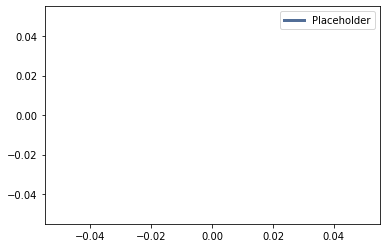

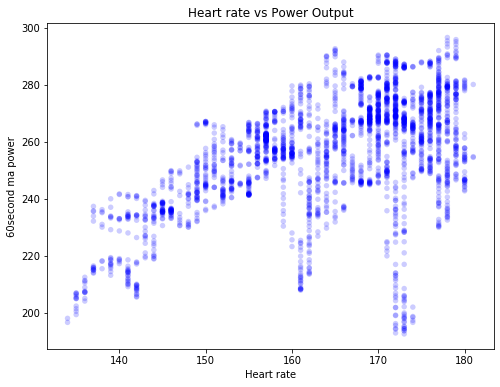

<Figure size 576x432 with 0 Axes>

In [20]:
# Now do a scatter plot of heart rate vs power
#Placeholder to get rid of the smaller size graph


####  This whole graph is invalid because most of the MinutePowerMean numbers are NAN's
thinkplot.Plot([0],[0],label='Placeholder')    
thinkplot.Show()

thinkplot.Scatter(xs=allruns.Heartrate,ys=allruns.MinutePowerMean,alpha=0.2)
thinkplot.Config(title='Heart rate vs Power Output',xlabel='Heart rate',ylabel='60second ma power')
thinkplot.Show()


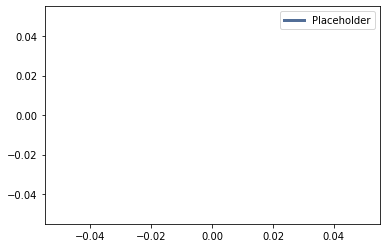

1 Minute Movering Average Power vs Heart Rate for Consistent  power delivery
  


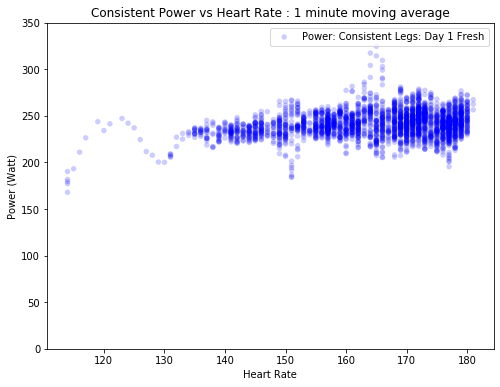

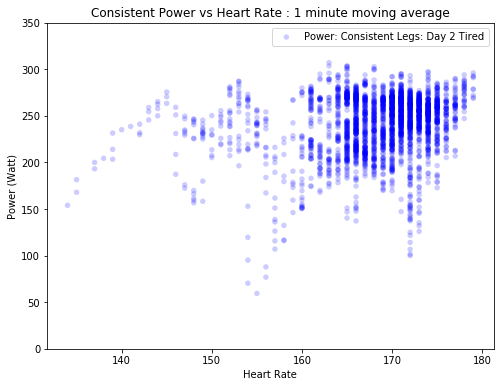

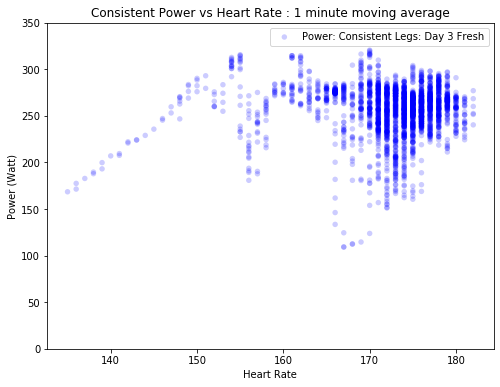

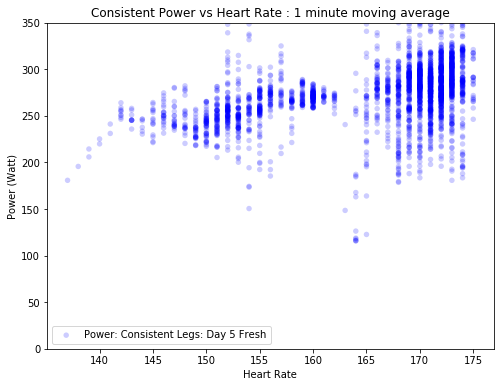

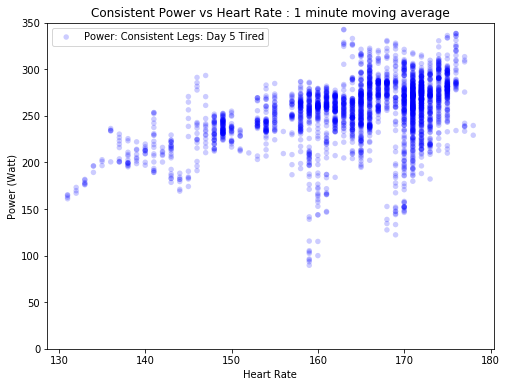

1 Minute Movering Average Power vs Heart Rate for Variable  power delivery
  


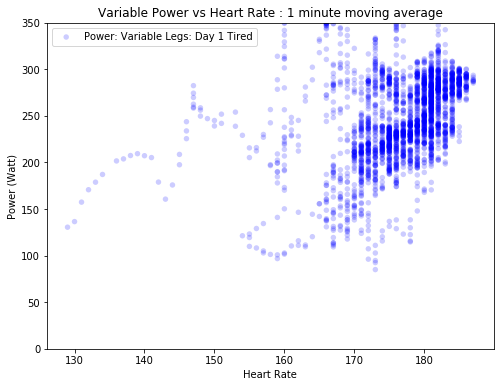

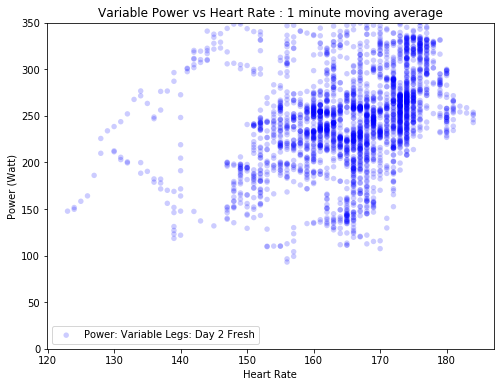

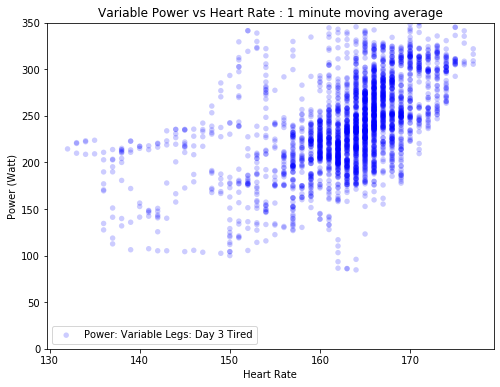

<Figure size 576x432 with 0 Axes>

In [79]:
# Now do scatter plots for the individual runs


#Placeholder to get rid of the smaller size graph
thinkplot.Plot([0],[0],label='Placeholder')    
thinkplot.Show()


for style,value in files.PowerStyle.value_counts().items():
    #Power applied over time, smoothed over five minutes
    print('=============================================')
    print('1 Minute Movering Average Power vs Heart Rate for',style,' power delivery')
    print('=============================================')
    print('  ')
    for index,row in files[files.PowerStyle==style].iterrows():
        #thinkplot.Scatter(xs=row.RunDF.Heartrate,ys=row.RunDF.TenSecPowerMean,alpha=0.2, label='Power: '+row.PowerStyle+' Legs: '+row.LegState)
        thinkplot.Scatter(xs=row.RunDF.Heartrate,ys=row.RunDF.TenSecondShiftedTwentySeconds,alpha=0.2, label='Power: '+row.PowerStyle+' Legs: '+row.LegState)
        thinkplot.Config(xlabel='Heart Rate', ylabel='Power (Watt)',title=style+' Power vs Heart Rate : 1 minute moving average',ylim=(0,350))
        thinkplot.Show()




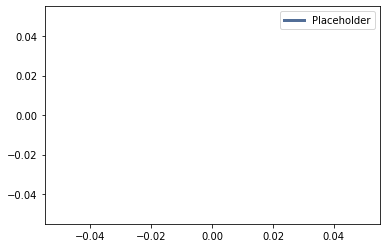

1 Minute Movering Average Power vs Heart Rate for Consistent  power delivery
  


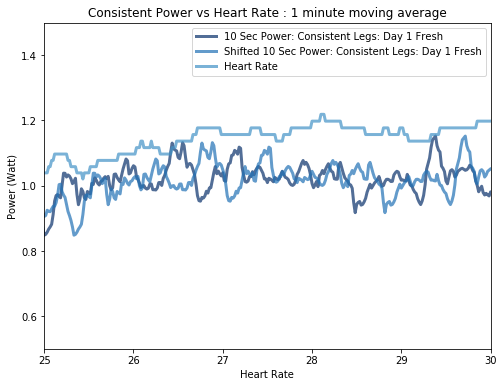

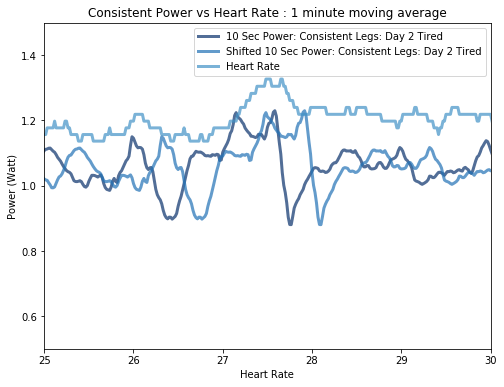

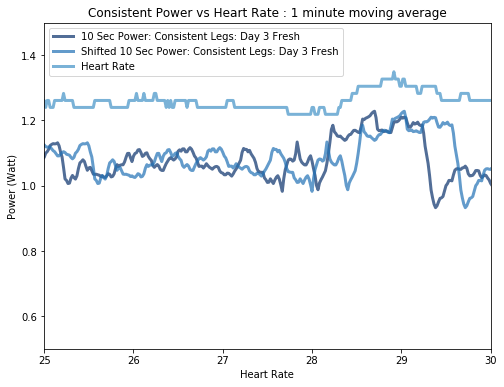

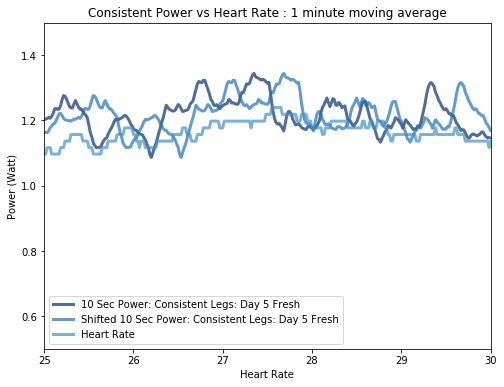

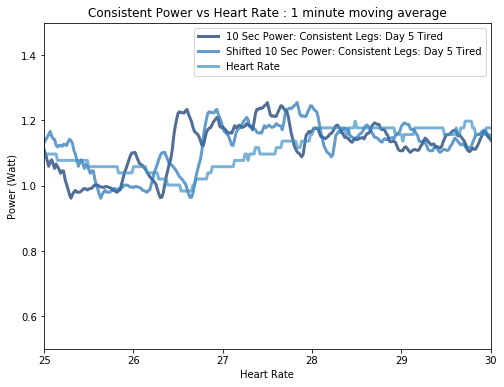

1 Minute Movering Average Power vs Heart Rate for Variable  power delivery
  


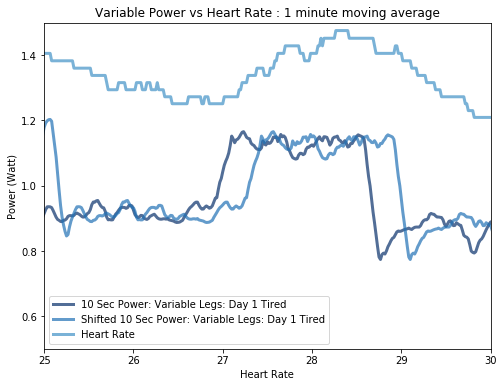

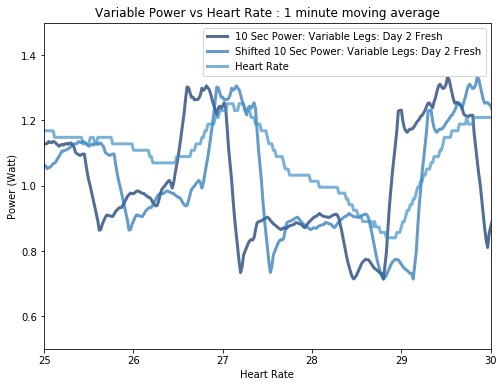

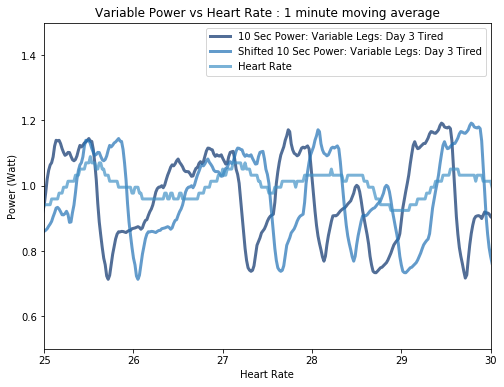

<Figure size 576x432 with 0 Axes>

In [78]:
# Now do scatter plots for the individual runs


#Placeholder to get rid of the smaller size graph
thinkplot.Plot([0],[0],label='Placeholder')    
thinkplot.Show()


for style,value in files.PowerStyle.value_counts().items():
    #Power applied over time, smoothed over five minutes
    powermean = row.RunDF.TenSecPowerMean.mean()
    heartmean = row.RunDF.Heartrate.mean()
    print('=============================================')
    print('1 Minute Movering Average Power vs Heart Rate for',style,' power delivery')
    print('=============================================')
    print('  ')
    for index,row in files[files.PowerStyle==style].iterrows():
        thinkplot.Plot(row.RunDF.ElapasedDuration/1000/60,row.RunDF.TenSecPowerMean/powermean, label='10 Sec Power: '+row.PowerStyle+' Legs: '+row.LegState)
        thinkplot.Plot(row.RunDF.ElapasedDuration/1000/60,row.RunDF.TenSecondShiftedTwentySeconds/powermean, label='Shifted 10 Sec Power: '+row.PowerStyle+' Legs: '+row.LegState)
        thinkplot.Plot(row.RunDF.ElapasedDuration/1000/60,(row.RunDF.Heartrate/heartmean)**3, label='Heart Rate')
        #thinkplot.Plot(row.RunDF.ElapasedDuration/1000/60,row.RunDF.MinutePowerMean/powermean, label='Power: '+row.PowerStyle+' Legs: '+row.LegState)

        #thinkplot.Plot(row.RunDF.ElapasedDuration/1000/60,(row.RunDF.TenSecPowerMean/powermean)/((row.RunDF.Heartrate/heartmean)**3), label='Power to Heart Rate')
        thinkplot.Config(xlabel='Heart Rate', ylabel='Power (Watt)',title=style+' Power vs Heart Rate : 1 minute moving average')
        thinkplot.Config(xlim=(25,30),ylim=(0.5,1.5))
        thinkplot.Show()



